In [1]:
import trackpy as tp 
import pims
import glob
import numpy
import matplotlib.pyplot as plt

In [2]:
path = "../data/onion_2/Onion_bulk_20x/*.bmp"
frames = pims.as_grey(pims.open(path))#pims.open(path)

In [3]:
frames[0].shape

(200, 200)

Frame([[ 84.5101,  84.5101,  84.5101, ..., 114.9331, 119.4474, 126.3677],
       [ 92.477 ,  92.6895,  92.7616, ..., 123.9857, 129.2875, 136.9232],
       [ 85.4418,  85.4418,  85.2976, ..., 114.9331, 119.9465, 124.7206],
       ...,
       [116.0128, 111.0262, 106.584 , ...,  89.7284,  89.1572,  89.3697],
       [128.4261, 123.1491, 118.9953, ...,  98.3366,  97.6212,  97.4087],
       [118.5061, 113.732 , 110.7206, ...,  89.438 ,  90.2976,  90.0851]])
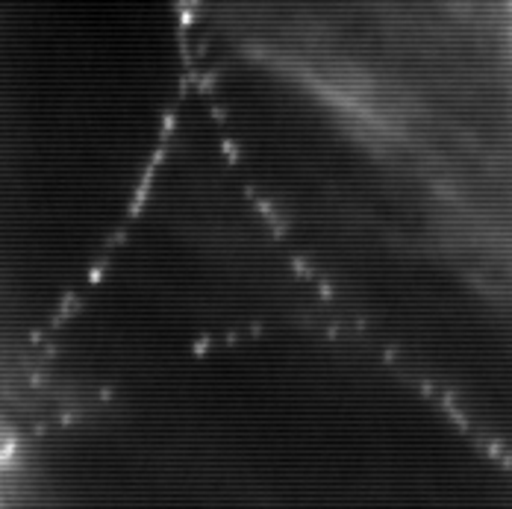

In [10]:
frames[0][:-27, 26:]

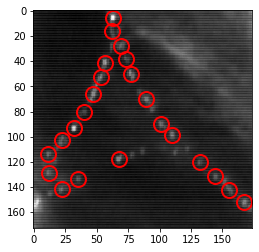

<AxesSubplot:>

In [38]:
loc = tp.locate(frames[0][:-27, 26:], diameter=9, minmass=132, maxsize=3)
tp.annotate(loc, frames[0][:-27, 26:])

Frame 357: 25 trajectories present.


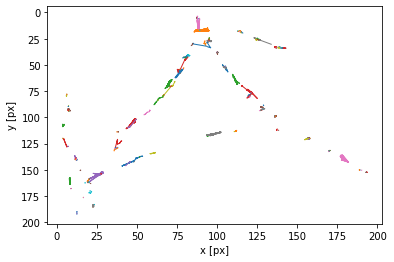

<AxesSubplot:xlabel='x [px]', ylabel='y [px]'>

In [40]:
# to process the whole data run
all_imgs = tp.batch(frames, diameter=9, minmass=132, maxsize=3)
linked = tp.link(all_imgs, 10)
tp.plot_traj(linked)

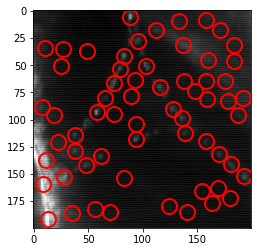

<AxesSubplot:>

In [7]:
tp.annotate(all_imgs[all_imgs.frame == 0], frames[0])

Alternatively we can look at the points from the raw image and pick out the colors of the dots before filtering

possible thresholding for image background to speed up the algorithm

Frame([[ 93.6543,  92.5139,  93.2293, ..., 114.9331, 119.4474, 126.3677],
       [102.4145, 101.9116, 101.6953, ..., 123.9857, 129.2875, 136.9232],
       [ 92.7226,  92.2976,  93.3735, ..., 114.9331, 119.9465, 124.7206],
       ...,
       [114.2096, 115.9875, 117.7067, ...,  93.05  ,  92.7616,  93.2645],
       [107.9409, 109.2938, 111.1572, ...,  86.1534,  86.1534,  85.7284],
       [111.4145, 113.9078, 115.627 , ...,  93.5491,  93.477 ,  93.2645]])
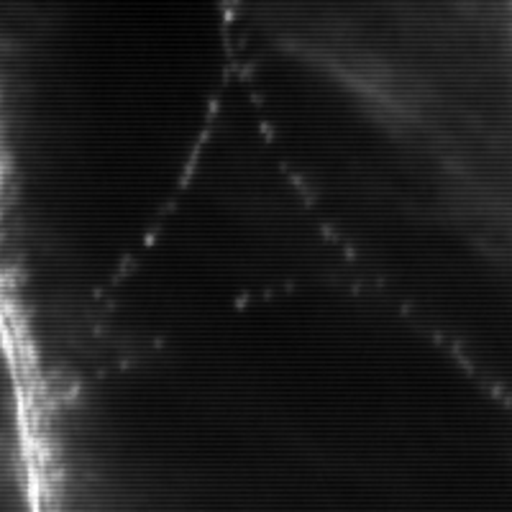

In [8]:
frames[0]

In [9]:
# thanks to Luc
def color_plot(img, show_frac=.1, hsv=True, pshow=1, mask=None):

    from mpl_toolkits.mplot3d import Axes3D
    from matplotlib import cm
    from matplotlib import colors
    pixel_colors = img.reshape((np.shape(img)[0]*np.shape(img)[1], 3))
    norm = colors.Normalize(vmin=-1.,vmax=1.)
    norm.autoscale(pixel_colors)
    pixel_colors = norm(pixel_colors)

    if hsv:
        h, s, v = cv2.split(cv2.cvtColor(img, cv2.COLOR_RGB2HSV))
    else:
        h, s, v = cv2.split(img)

    if mask is not None:
        h,s,v = h[mask], s[mask], v[mask]
    else:
        h,s,v = h.flatten(), s.flatten(), v.flatten()
    idx = np.random.choice(h.size, int(h.size*show_frac), replace=False)

    fig = plt.figure()
    axis = fig.add_subplot(1, 1, 1, projection="3d")
    # print(len(pixel_colors))
    # raise Exception()
    axis.scatter(h[idx], s[idx], v[idx], facecolors=pixel_colors[idx].tolist(), marker=".")
    if hsv:
        axis.set_xlabel("Hue")
        axis.set_ylabel("Saturation")
        axis.set_zlabel("Value")
    else:
        axis.set_xlabel("Red")
        axis.set_ylabel("Green")
        axis.set_zlabel("Blue")

    if pshow:
        plt.show()

    return fig, axis

In [68]:
path2 = "../data/beads/1.66_visc_PVP_0.4_um-40x/*.bmp"
frames2 = pims.as_grey(pims.open(path2))#pims.open(path)

Frame([[99.3674, 98.8645, 98.9366, ..., 83.3558, 82.9232, 81.2799],
       [86.5916, 86.8041, 86.8041, ..., 73.5119, 73.5119, 73.8023],
       [98.5078, 99.4357, 99.5078, ..., 82.9953, 82.2799, 81.352 ],
       ...,
       [81.7358, 81.4454, 81.7338, ..., 65.1552, 64.3677, 64.1552],
       [92.3636, 93.2915, 94.2953, ..., 74.777 , 74.7049, 74.4924],
       [83.8041, 84.6541, 84.2271, ..., 64.4398, 65.0831, 64.8706]])
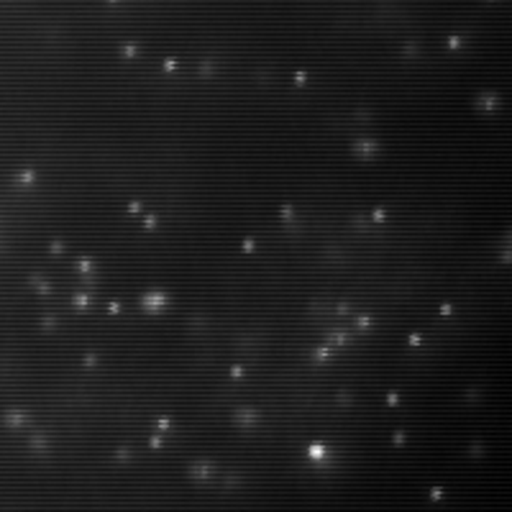

In [69]:
frames2[0]

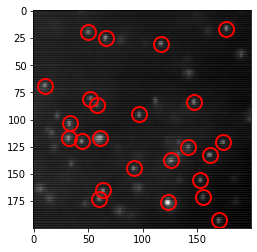

<AxesSubplot:>

In [72]:
loc2 = tp.locate(frames2[0], diameter=5, minmass=50, maxsize=3)
tp.annotate(loc2, frames2[0])

Frame 457: 30 trajectories present.


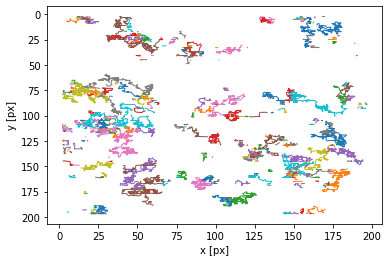

<AxesSubplot:xlabel='x [px]', ylabel='y [px]'>

In [73]:
all_imgs2 = tp.batch(frames2, diameter=5, minmass=50, maxsize=3)
linked2 = tp.link(all_imgs2, 10)
tp.plot_traj(linked2)

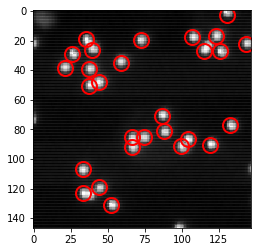

<AxesSubplot:>

In [74]:
path3 = "../data/beads/1.66_visc_PVP_2.03_um-20x/*.bmp"
frames3 = pims.as_grey(pims.open(path3))#pims.open(path)

loc3 = tp.locate(frames3[0], diameter=5, minmass=50, maxsize=3)
tp.annotate(loc3, frames3[0])

Frame 460: 30 trajectories present.


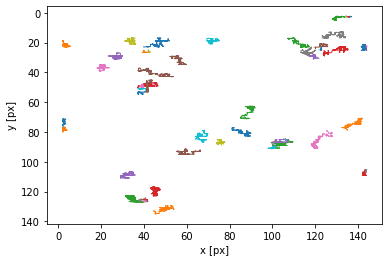

<AxesSubplot:xlabel='x [px]', ylabel='y [px]'>

In [75]:
all_imgs3 = tp.batch(frames3, diameter=5, minmass=50, maxsize=3)
linked3 = tp.link(all_imgs3, 10)
tp.plot_traj(linked3)

In [91]:
def annotate(filepath, diameter=5, minmass=50, maxsize=3):
    frames = pims.as_grey(pims.open(filepath))#pims.open(path)

    loc = tp.locate(frames[0], diameter=diameter, minmass=minmass, maxsize=maxsize)
    tp.annotate(loc, frames[0])
    return frames

def get_trajectories(frames,search_range=10, diameter=5, minmass=50, maxsize=3):
    all_imgs = tp.batch(frames, diameter=diameter, minmass=minmass, maxsize=maxsize)
    linked = tp.link(all_imgs, search_range=search_range)
    tp.plot_traj(linked)

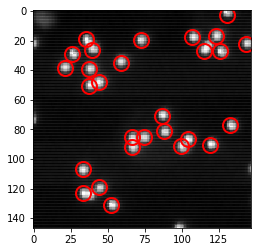

In [92]:
dummy = annotate(path3, diameter=5)

Frame 460: 30 trajectories present.


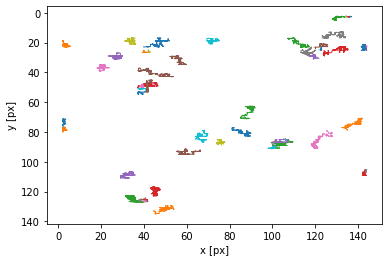

In [93]:
get_trajectories(dummy)

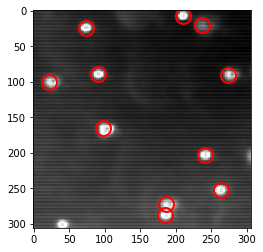

In [288]:
path4 = "../data/beads/1.66_visc_PVP_2.03_um-40x/*.bmp"
dummy2 = annotate(path4, diameter=15, minmass=350, maxsize=5)

Frame 464: 10 trajectories present.


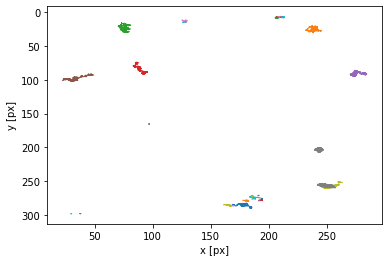

In [289]:
get_trajectories(dummy2, diameter=15, minmass=350, maxsize=5)

In [120]:
# no comment

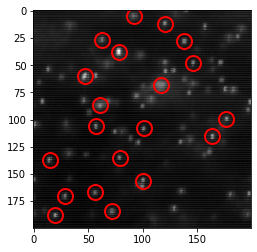

In [165]:
path5 = '../data/beads/4.65_visc_GLY_0.4_um-40x-2/*.bmp'
dummy3 = annotate(path5, diameter=11, minmass=500, maxsize=11)

Frame 464: 28 trajectories present.


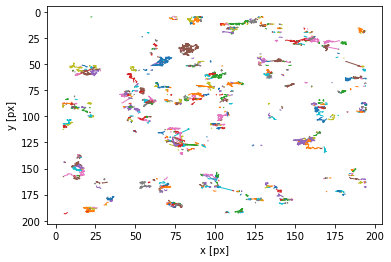

In [241]:
get_trajectories(dummy3, diameter=11, minmass=500, maxsize=11)

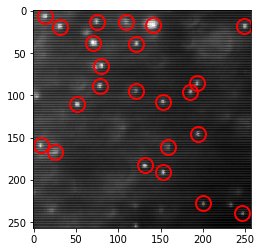

In [176]:
path6 = '../data/beads/4.65_visc_PVP_0.4_um-40x/*.bmp'
dummy4 = annotate(path6, diameter=11, minmass=500, maxsize=11)

Frame 174: 19 trajectories present.


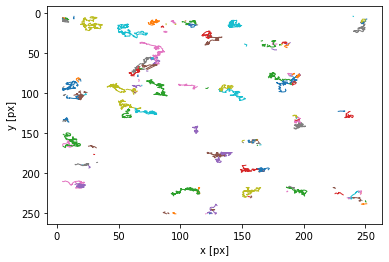

In [242]:
get_trajectories(dummy4, diameter=11, minmass=500, maxsize=11)

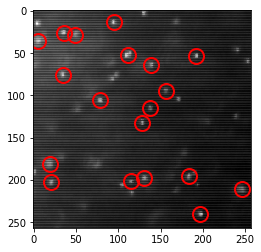

In [178]:
path7 = '../data/beads/4.65_visc_PVP_0.4_um-40x-2/*.bmp'
dummy5 = annotate(path7, diameter=11, minmass=500, maxsize=11)

Frame 179: 19 trajectories present.


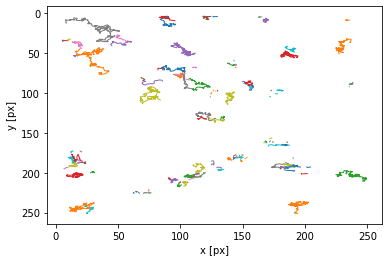

In [243]:
get_trajectories(dummy5, diameter=11, minmass=500, maxsize=11)

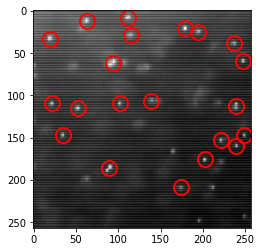

In [181]:
path8 = '../data/beads/13.2_visc_PVP_0.4_um-40x/*.bmp'
dummy6 = annotate(path8, diameter=11, minmass=500, maxsize=11)

Frame 768: 24 trajectories present.


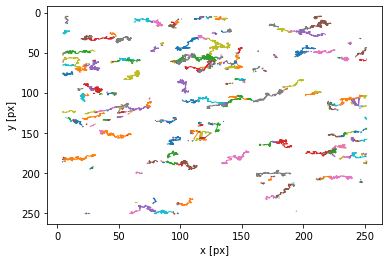

In [244]:
get_trajectories(dummy6, diameter=11, minmass=500, maxsize=11)

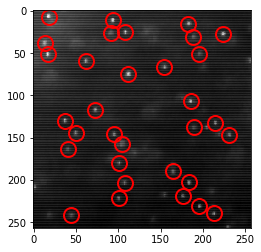

In [185]:
path9 = '../data/beads/13.2_visc_PVP_0.4_um-40x-2/*.bmp'
dummy7 = annotate(path9, diameter=11, minmass=300, maxsize=11)

Frame 83: 31 trajectories present.


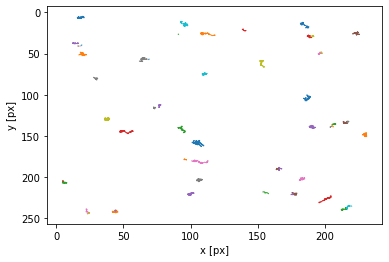

In [245]:
get_trajectories(dummy7, diameter=11, minmass=300, maxsize=11)

## Onion Exploration

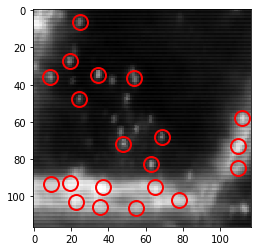

In [379]:
path10 = '../data/onion_1/Onion-cytoplasm-20x-3/*.bmp'
dummy8 = annotate(path10, diameter=9, minmass=350, maxsize=15)

Frame 92: 37 trajectories present.


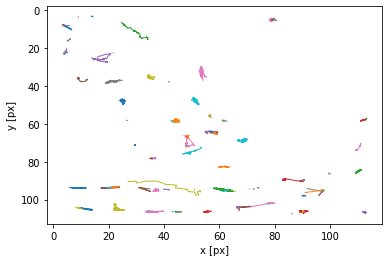

In [384]:
get_trajectories(dummy8, search_range=6, diameter=7)

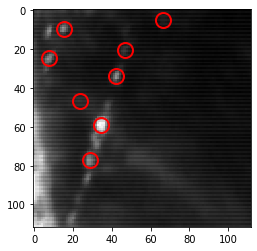

array([[<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>]], dtype=object)

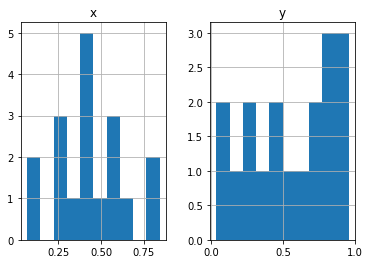

In [386]:
path11 = '../data/onion_2/Onion_bulk_20x-2/*.bmp'
frame11 = pims.as_grey(pims.open(path11))
dummy9 = annotate(path11, diameter=11, minmass=132, maxsize=3)
tp.subpx_bias(tp.locate(frame11[0], 11))

Frame 324: 8 trajectories present.


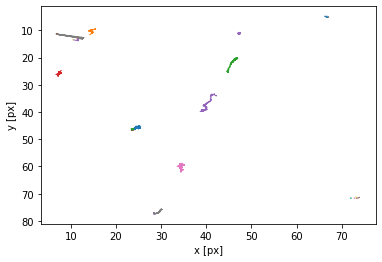

In [387]:
get_trajectories(dummy9, search_range=6, diameter=11, minmass=132, maxsize=3)

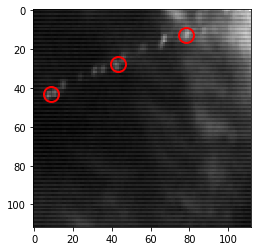

array([[<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>]], dtype=object)

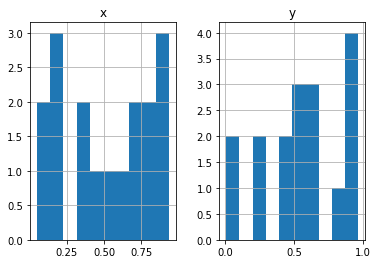

In [390]:
path12 = '../data/onion_2/Onion_bulk_20x-3/*.bmp'
frame12 = pims.as_grey(pims.open(path12))
dummy10 = annotate(path12, diameter=11, minmass=100, maxsize=3)
tp.subpx_bias(tp.locate(frame12[0], 11))

Frame 331: 6 trajectories present.


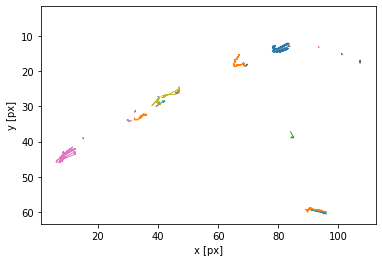

In [392]:
get_trajectories(dummy10, search_range=6, diameter=9, minmass=100, maxsize=3)

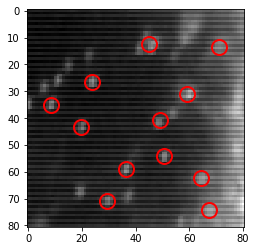

array([[<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>]], dtype=object)

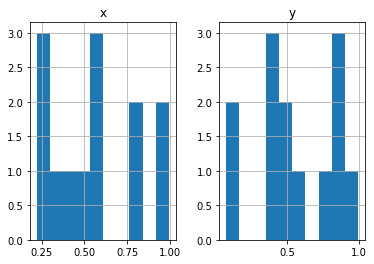

In [336]:
path13 = '../data/onion_2/Onion_bulk_20x-7/*.bmp'
frame13 = pims.as_grey(pims.open(path13))
dummy11 = annotate(path13, diameter=11, minmass=100, maxsize=3)
tp.subpx_bias(tp.locate(frame13[0], 11))

Frame 299: 11 trajectories present.


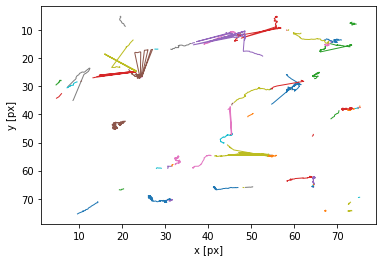

In [337]:
get_trajectories(dummy11, diameter=11, minmass=100, maxsize=3)

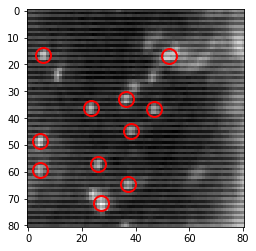

array([[<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>]], dtype=object)

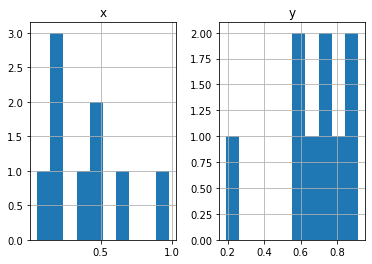

In [360]:
path14 = '../data/onion_2/Onion_bulk_20x-8/*.bmp'
frame14 = pims.as_grey(pims.open(path14))
dummy12 = annotate(path14, diameter=9, minmass=100, maxsize=3)
tp.subpx_bias(tp.locate(frame14[0], 11))

Frame 264: 7 trajectories present.


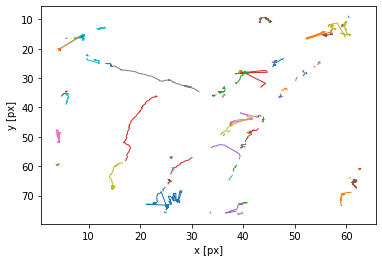

In [359]:
get_trajectories(dummy12, search_range=6, diameter=9, minmass=100, maxsize=3)

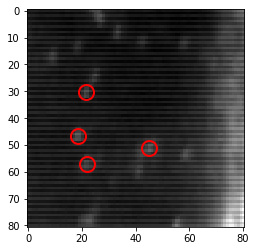

array([[<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>]], dtype=object)

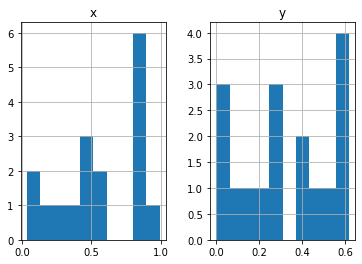

In [356]:
path15 = '../data/onion_2/Onion_bulk_20x-9/*.bmp'
frame15 = pims.as_grey(pims.open(path15))
dummy13 = annotate(path15, diameter=9, minmass=100, maxsize=3)
tp.subpx_bias(tp.locate(frame15[0], 9))

Frame 288: 6 trajectories present.


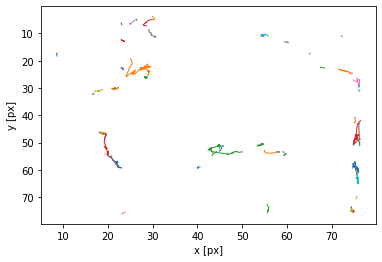

In [358]:
get_trajectories(dummy13, search_range=6, diameter=9, minmass=100, maxsize=3)

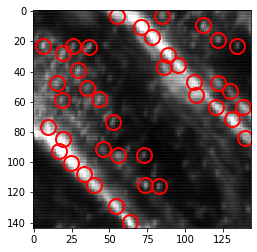

array([[<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>]], dtype=object)

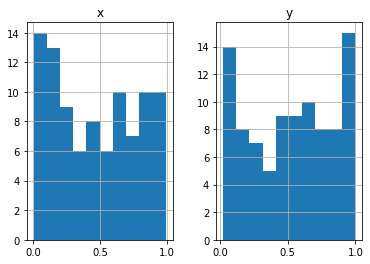

In [371]:
path16 = '../data/onion_2/Onion_cytoplasm_20x-6/*.bmp'
frame16 = pims.as_grey(pims.open(path16))
dummy14 = annotate(path16, diameter=7, minmass=150, maxsize=3)
tp.subpx_bias(tp.locate(frame16[0], 7))

Frame 458: 41 trajectories present.


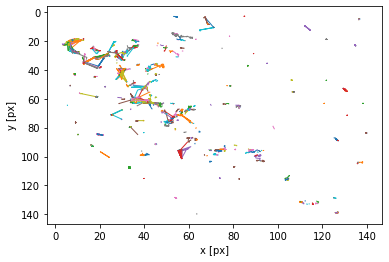

In [375]:
get_trajectories(dummy14, search_range=7, diameter=7, minmass=150, maxsize=3)